In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import linregress

All lithologies, N = 20282

The equation for basalt is:  
-39.07 x + 115.7
N = 383
Slope:  -39.0675648869484
Intercept 115.68240143069517
r^2 -0.9007469135252367
p 4.689651108488005e-140

The equation for nannofossil ooze is:  
-55.14 x + 154.2
N = 1771
Slope:  -55.1386602306395
Intercept 154.17682182257926
r^2 -0.9819406602366265
p 0.0


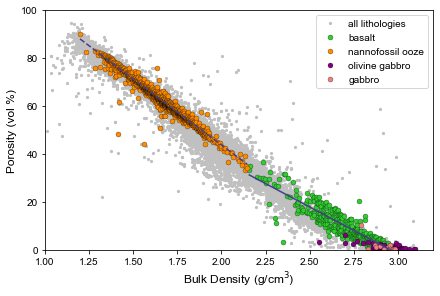

In [3]:
data = pd.read_csv (r'C:\Users\percuoco\Desktop\Bulk_Density_against_Porosity_by_Principal_Lithology.csv', header=0, dtype={'BulkDensity':float,'Porosity':float,'Average of Depth.CSF.A..m.': float,'PrincipalMapped': str})
dataset = pd.DataFrame(data, columns= ['BulkDensity','Porosity', 'Average of Depth.CSF.A..m.', 'PrincipalMapped'])
dataset.rename(columns= {'Average of Depth.CSF.A..m.':'Depth'}, inplace = True)

#Remove outliers
cleaned_dataset = dataset[(dataset.Porosity <= 100) & (dataset.Porosity >=0) & (dataset.BulkDensity >=0) & (dataset.BulkDensity <= 4)]
#cleaned_dataset = cleaned_dataset[(np.abs(stats.zscore(cleaned_dataset['BulkDensity'])) < 3)]

#Set fonts
# Say, "the default sans-serif font is COMIC SANS"
mpl.rcParams['font.sans-serif'] = 'Arial'
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = 'sans-serif'

#Ensure the plot writes editable text which can be recognized by Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#Instantiate the plot
fig, axes = plt.subplots(constrained_layout=True)

#Ensures the plot holds so you can overly data series
plt.hold=True 

#Highlighted series
data_series_array = ['basalt','nannofossil ooze','olivine gabbro', 'gabbro']

second_series_name = 'basalt'
third_series_name = 'nannofossil ooze'
fourth_series_name = 'olivine gabbro'
fifth_series_name = 'gabbro'

#Series colors
data_series_color_array = ['limegreen', 'darkorange', 'purple', 'lightcoral']

first_series_color = 'silver'
second_series_color = 'limegreen'
third_series_color = 'darkorange'
fourth_series_color = 'purple'
fifth_series_color = 'lightcoral'

#Plot the data
axes.plot(cleaned_dataset.BulkDensity, cleaned_dataset.Porosity, marker='o', linestyle='', color=first_series_color, markerfacecolor=first_series_color, markeredgewidth=0.25, markersize=3, label='all lithologies')
print('All lithologies, N =',len(cleaned_dataset.index))

#plot subseries 1
second_series = cleaned_dataset[cleaned_dataset.PrincipalMapped == second_series_name]
second_series = second_series[(np.abs(stats.zscore(second_series['BulkDensity'])) < 3)]
second_series = second_series[(second_series.Porosity <=50)]
axes.plot(second_series.BulkDensity, second_series.Porosity, marker='o', linestyle='', color=second_series_color, markerfacecolor=second_series_color, markeredgecolor='black', markeredgewidth=0.25, markersize=5, label=second_series_name )

#plot subseries 2
third_series= cleaned_dataset[cleaned_dataset.PrincipalMapped ==third_series_name]
#third_series = third_series[(np.abs(stats.zscore(third_series['BulkDensity'])) < 3)]
axes.plot(third_series.BulkDensity, third_series.Porosity, marker='o', linestyle='', color=third_series_color, markerfacecolor=third_series_color, markeredgecolor='black', markeredgewidth=0.25, markersize=5, label=third_series_name)

#plot subseries 3
fourth_series= cleaned_dataset[(cleaned_dataset.PrincipalMapped ==fourth_series_name)]
#third_series = third_series[(np.abs(stats.zscore(third_series['BulkDensity'])) < 3)]
axes.plot(fourth_series.BulkDensity, fourth_series.Porosity, marker='o', linestyle='', color=fourth_series_color, markerfacecolor=fourth_series_color, markeredgecolor='black', markeredgewidth=0.25, markersize=5, label=fourth_series_name)

#plot subseries 4
fifth_series= cleaned_dataset[(cleaned_dataset.PrincipalMapped ==fifth_series_name)]
#third_series = third_series[(np.abs(stats.zscore(third_series['BulkDensity'])) < 3)]
axes.plot(fifth_series.BulkDensity, fifth_series.Porosity, marker='o', linestyle='', color=fifth_series_color, markerfacecolor=fifth_series_color, markeredgecolor='black', markeredgewidth=0.25, markersize=5, label=fifth_series_name)


#for index in range(len(data_series_array)):
    #  data_series = cleaned_dataset[cleaned_dataset.PrincipalMapped == data_series_array[index]]
    # axes.plot(data_series.BulkDensity, data_series.Porosity, marker='o', linestyle='', color=data_series_color_array[index], markerfacecolor=data_series_color_array[index], markeredgecolor='black', markeredgewidth=0.25, markersize=5, label=data_series_array[index])


#Set axes parameters
axes.set_xlabel('Bulk Density (g/cm$^3$)', fontname='Arial', fontsize=12)
axes.set_ylabel('Porosity (vol %)',  fontname='Arial', fontsize=12)
axes.set(xlim=(1, 3.2), ylim=(0, 100))

#Set figure title
#fig.suptitle('Bulk density vs porosity',  fontname='Arial', fontsize=16)

#Change plot color
ax = plt.gca()
axes.patch.set_facecolor("white")

#Turn on legend
axes.legend()

#Plot Regression Lines
z = np.polyfit(second_series.BulkDensity, second_series.Porosity, 1)
p = np.poly1d(z)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(second_series.BulkDensity,second_series.Porosity)
axes.plot(second_series.BulkDensity, p(second_series.BulkDensity), color="darkslateblue",linestyle='-')

#Print statistics
print('')
print('The equation for basalt is:', p)
print('N =',len(second_series.index))
print('Slope: ', slope)
print('Intercept', intercept)
print('r^2', r_value)
print('p', p_value)

#Print statistics
z = np.polyfit(third_series.BulkDensity, third_series.Porosity, 1)
p = np.poly1d(z)
axes.plot(third_series.BulkDensity, p(third_series.BulkDensity), color="darkslateblue",linestyle='--')
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(third_series.BulkDensity,third_series.Porosity)
print('')
print('The equation for nannofossil ooze is:', p)
print('N =',len(third_series.index))
print('Slope: ', slope)
print('Intercept', intercept)
print('r^2', r_value)
print('p', p_value)

#Show the plot
plt.show()